## Binary Churn Prediction

### Problem Statement
##### A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.

#### Data Description
##### The data is saved as customer_churn.csv. Here are the fields and their definitions:
##### Name : Name of the latest contact at CompanyAge: Customer AgeTotal_Purchase: Total Ads PurchasedAccount_Manager: Binary 0=No manager, 1= Account manager assignedYears: Total Years as a customerNum_sites: Number of websites that use the service.Onboard_date: Date that the name of the latest contact was onboardedLocation: Client HQ AddressCompany: Name of Client Company

#### Expected outcome Sample
##### Once you've created the model and evaluated it, test out the model on some new data (you can think of this almost like a hold-out set) that your client has provided, saved under new_customers.csv. The client wants to know which customers are most likely to churn given this data (they don't have the label yet).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
import seaborn as sns

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

### Data Load & Cleanup
##### 1. Importing data using the pandas library
##### 2. Understanding the structure of the data

In [3]:
data=pd.read_csv("customer_churn.csv")

In [4]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [5]:
data.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [6]:
#Checking for Correlation
corr=data.corr()
corr

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
Age,1.000000,-0.037208,-0.014749,0.005625,-0.006070,0.085926
Total_Purchase,-0.037208,1.000000,0.015856,-0.005623,-0.003390,0.024031
Account_Manager,-0.014749,0.015856,1.000000,0.022930,0.033401,0.070611
Years,0.005625,-0.005623,0.022930,1.000000,0.051642,0.214329
Num_Sites,-0.006070,-0.003390,0.033401,0.051642,1.000000,0.525398
Churn,0.085926,0.024031,0.070611,0.214329,0.525398,1.000000


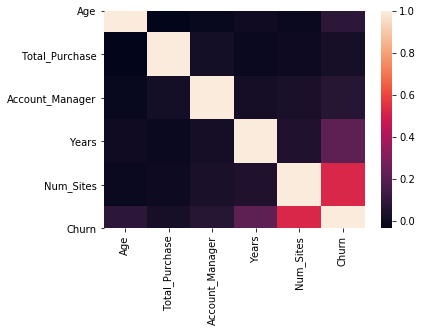

In [7]:
sns.heatmap(
    corr, 
    square=True)

##### Num_Sites have moderate positive correlation with churn while other variables have negligible positive relationship.

In [8]:
data['Location'].value_counts()

05418 Smith Brooks Richardfurt, DE 40166-1384                1
PSC 3040, Box 9946 APO AP 11064-1547                         1
1150 Archer Point Suite 946 Marksfurt, MH 51860              1
742 Ortiz Street Apt. 568 Robertland, AS 94732-7050          1
007 Davis Squares Flynnchester, SC 79849                     1
                                                            ..
983 Carl Run Apt. 446 West Christina, NM 45895               1
693 Kevin Groves Apt. 158 Debramouth, NV 73809               1
95222 Lisa Turnpike South Laurenburgh, NC 33273-8443         1
0792 Denise Lodge Apt. 903 Jenniferchester, HI 96154-9657    1
2091 Antonio Tunnel Apt. 841 Gibsonburgh, GU 98706           1
Name: Location, Length: 900, dtype: int64

In [9]:
#Deleting the features which are less important in use
data.drop(columns=['Names','Onboard_date','Location','Company'],axis=1,inplace=True)

In [10]:
data.head(3)

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1


In [11]:
data.shape

(900, 6)

In [12]:
data['Account_Manager'].value_counts()

0    467
1    433
Name: Account_Manager, dtype: int64

In [13]:
data['Churn'].value_counts()

0    750
1    150
Name: Churn, dtype: int64

##### 0 indicates customers not churn while 1 indicates customers churn.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
Age                900 non-null float64
Total_Purchase     900 non-null float64
Account_Manager    900 non-null int64
Years              900 non-null float64
Num_Sites          900 non-null float64
Churn              900 non-null int64
dtypes: float64(4), int64(2)
memory usage: 42.3 KB


In [15]:
#Missing Values
data.isnull().sum()

Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Churn              0
dtype: int64

##### There are no missing values in the dataset.

In [16]:
data.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [17]:
data.skew()

Age                0.091482
Total_Purchase    -0.104441
Account_Manager    0.075736
Years              0.006281
Num_Sites          0.185936
Churn              1.791842
dtype: float64

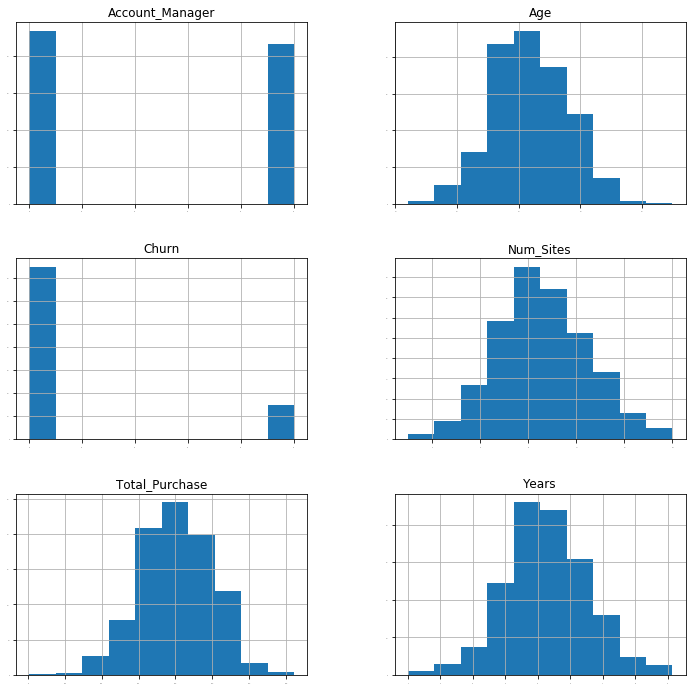

In [18]:
# to plot histograms 
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(12,12))
plt.show()

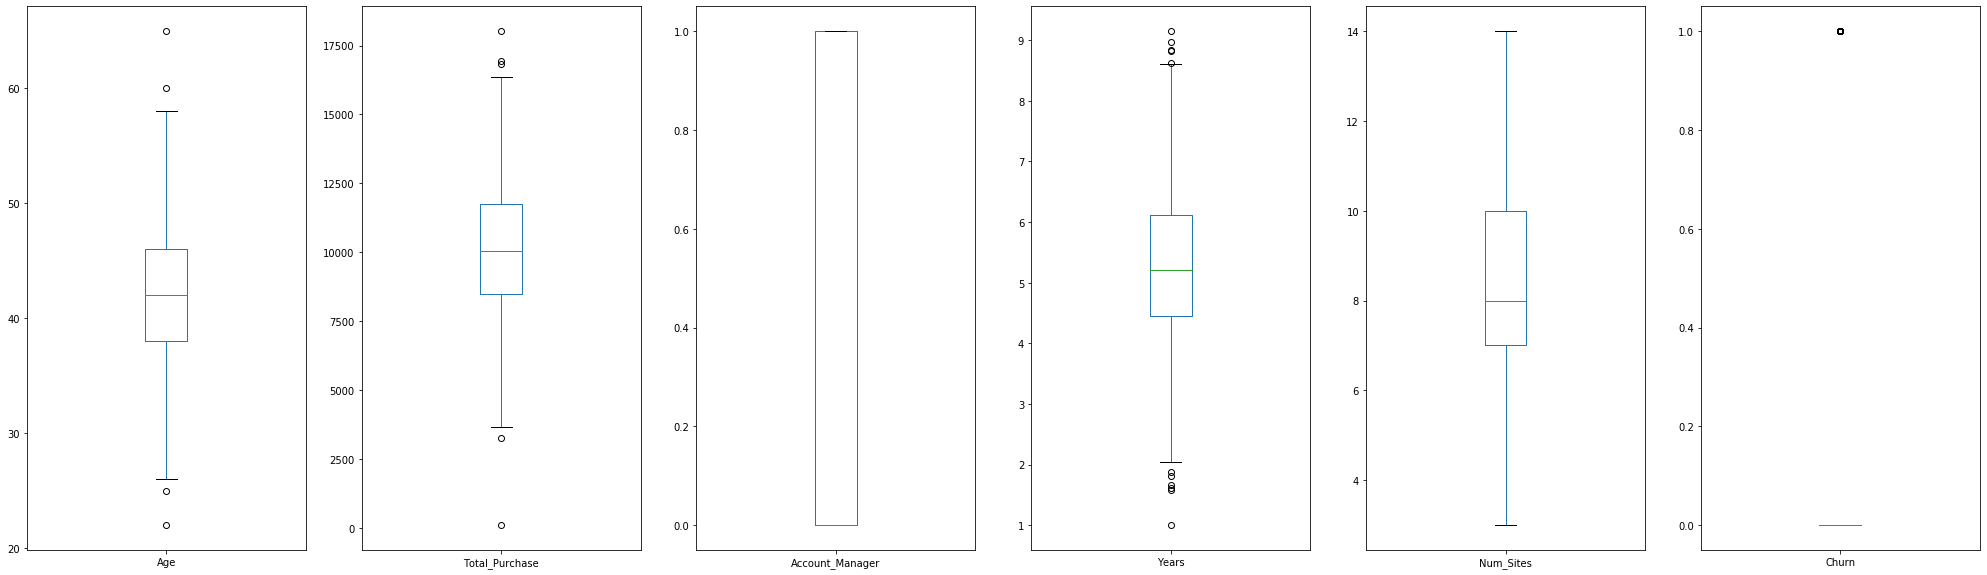

In [19]:
#Box Plot
data.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(35,10))
plt.show()

#### Outliers are there in some features like Age, Total_purchase, Years they are very less so can be neglected.

In [20]:
# Dividing data into predicting variables and Target variable.
X = data.iloc[:,:5]
X = X.values
y = data['Churn'].values

### Data splitting and Model Builing

#### 1) Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
for i in range(0,901):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    model1 = LogisticRegression(random_state = 10, class_weight='balanced', max_iter = 1000)
    model1.fit(X_train,y_train)
    train_score=model1.score(X_train,y_train)
    test_score=model1.score(X_test,y_test)
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.8666666666666667  Training 0.8238095238095238  Random State 0
Testing 0.6962962962962963  Training 0.6825396825396826  Random State 4
Testing 0.7444444444444445  Training 0.6619047619047619  Random State 5
Testing 0.6962962962962963  Training 0.6761904761904762  Random State 10
Testing 0.7074074074074074  Training 0.665079365079365  Random State 11
Testing 0.6962962962962963  Training 0.6746031746031746  Random State 12
Testing 0.7148148148148148  Training 0.7031746031746032  Random State 15
Testing 0.8407407407407408  Training 0.8238095238095238  Random State 16
Testing 0.8629629629629629  Training 0.834920634920635  Random State 18
Testing 0.7111111111111111  Training 0.6730158730158731  Random State 22
Testing 0.7148148148148148  Training 0.6984126984126984  Random State 24
Testing 0.7407407407407407  Training 0.6952380952380952  Random State 28
Testing 0.6962962962962963  Training 0.692063492063492  Random State 29
Testing 0.7111111111111111  Training 0.6698412698412698  

Testing 0.8518518518518519  Training 0.8317460317460318  Random State 256
Testing 0.8777777777777778  Training 0.8142857142857143  Random State 257
Testing 0.6851851851851852  Training 0.6841269841269841  Random State 258
Testing 0.8481481481481481  Training 0.8317460317460318  Random State 263
Testing 0.7037037037037037  Training 0.665079365079365  Random State 271
Testing 0.8666666666666667  Training 0.8126984126984127  Random State 274
Testing 0.7185185185185186  Training 0.665079365079365  Random State 275
Testing 0.8518518518518519  Training 0.8301587301587302  Random State 279
Testing 0.8407407407407408  Training 0.819047619047619  Random State 280
Testing 0.7333333333333333  Training 0.6555555555555556  Random State 282
Testing 0.8407407407407408  Training 0.8333333333333334  Random State 287
Testing 0.6814814814814815  Training 0.6777777777777778  Random State 288
Testing 0.7148148148148148  Training 0.6888888888888889  Random State 290
Testing 0.825925925925926  Training 0.823

Testing 0.7148148148148148  Training 0.6952380952380952  Random State 531
Testing 0.6962962962962963  Training 0.6698412698412698  Random State 535
Testing 0.8629629629629629  Training 0.807936507936508  Random State 536
Testing 0.6962962962962963  Training 0.6476190476190476  Random State 538
Testing 0.6888888888888889  Training 0.6746031746031746  Random State 539
Testing 0.8481481481481481  Training 0.8253968253968254  Random State 540
Testing 0.8407407407407408  Training 0.8238095238095238  Random State 541
Testing 0.6814814814814815  Training 0.6730158730158731  Random State 542
Testing 0.6962962962962963  Training 0.6761904761904762  Random State 543
Testing 0.8666666666666667  Training 0.8174603174603174  Random State 549
Testing 0.7037037037037037  Training 0.6841269841269841  Random State 551
Testing 0.8555555555555555  Training 0.8126984126984127  Random State 552
Testing 0.674074074074074  Training 0.6634920634920635  Random State 555
Testing 0.8851851851851852  Training 0.8

Testing 0.7  Training 0.6587301587301587  Random State 812
Testing 0.7074074074074074  Training 0.6682539682539682  Random State 816
Testing 0.7111111111111111  Training 0.6873015873015873  Random State 818
Testing 0.6888888888888889  Training 0.6698412698412698  Random State 820
Testing 0.8555555555555555  Training 0.8269841269841269  Random State 824
Testing 0.8518518518518519  Training 0.834920634920635  Random State 828
Testing 0.8407407407407408  Training 0.834920634920635  Random State 835
Testing 0.8592592592592593  Training 0.8063492063492064  Random State 837
Testing 0.8444444444444444  Training 0.8222222222222222  Random State 838
Testing 0.837037037037037  Training 0.8269841269841269  Random State 840
Testing 0.7222222222222222  Training 0.6666666666666666  Random State 842
Testing 0.8666666666666667  Training 0.8317460317460318  Random State 844
Testing 0.8555555555555555  Training 0.8269841269841269  Random State 845
Testing 0.837037037037037  Training 0.834920634920635  R

##### The random state value for which Testing accuracy is maximum is 0.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

In [24]:
model1 = LogisticRegression(random_state = 10, class_weight='balanced', max_iter = 1000)
model1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=10)

In [25]:
("Training Score:",model1.score(X_train,y_train))

('Training Score:', 0.8238095238095238)

In [26]:
("Testing Score:",model1.score(X_test,y_test))

('Testing Score:', 0.8666666666666667)

In [27]:
print('classes: ',model1.classes_)
print('coefficients: ',model1.coef_)
print('intercept :',model1.intercept_)

classes:  [0 1]
coefficients:  [[5.81122213e-02 4.95775259e-05 3.99695766e-01 5.81828579e-01
  1.14946737e+00]]
intercept : [-17.27403797]


#### 2) Linear Discriminant Analysis

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
for i in range(0,901):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    model2 = LinearDiscriminantAnalysis()
    model2.fit(X_train,y_train)
    
    train_score = model2.score(X_train,y_train)
    test_score = model2.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")
    

Testing 0.9222222222222223  Training 0.8857142857142857  Random State 0
Testing 0.9  Training 0.8968253968253969  Random State 4
Testing 0.9259259259259259  Training 0.8825396825396825  Random State 5
Testing 0.9296296296296296  Training 0.8841269841269841  Random State 6
Testing 0.9222222222222223  Training 0.8904761904761904  Random State 10
Testing 0.9148148148148149  Training 0.8888888888888888  Random State 11
Testing 0.9185185185185185  Training 0.8857142857142857  Random State 12
Testing 0.9259259259259259  Training 0.8793650793650793  Random State 15
Testing 0.9074074074074074  Training 0.8936507936507937  Random State 21
Testing 0.9037037037037037  Training 0.8904761904761904  Random State 22
Testing 0.9148148148148149  Training 0.8873015873015873  Random State 27
Testing 0.9222222222222223  Training 0.8857142857142857  Random State 29
Testing 0.8962962962962963  Training 0.8936507936507937  Random State 33
Testing 0.9  Training 0.8936507936507937  Random State 34
Testing 0.91

Testing 0.9111111111111111  Training 0.8952380952380953  Random State 314
Testing 0.8962962962962963  Training 0.8952380952380953  Random State 320
Testing 0.9  Training 0.8968253968253969  Random State 323
Testing 0.9074074074074074  Training 0.8936507936507937  Random State 324
Testing 0.937037037037037  Training 0.8777777777777778  Random State 326
Testing 0.9074074074074074  Training 0.8936507936507937  Random State 331
Testing 0.8925925925925926  Training 0.8920634920634921  Random State 333
Testing 0.9074074074074074  Training 0.8968253968253969  Random State 334
Testing 0.9  Training 0.8968253968253969  Random State 337
Testing 0.9074074074074074  Training 0.8952380952380953  Random State 338
Testing 0.9148148148148149  Training 0.8904761904761904  Random State 339
Testing 0.9037037037037037  Training 0.8952380952380953  Random State 341
Testing 0.9037037037037037  Training 0.8888888888888888  Random State 345
Testing 0.9148148148148149  Training 0.8888888888888888  Random State

Testing 0.9  Training 0.8968253968253969  Random State 649
Testing 0.9111111111111111  Training 0.8952380952380953  Random State 655
Testing 0.9  Training 0.8904761904761904  Random State 657
Testing 0.9  Training 0.8984126984126984  Random State 659
Testing 0.9074074074074074  Training 0.8904761904761904  Random State 660
Testing 0.9037037037037037  Training 0.8920634920634921  Random State 661
Testing 0.9  Training 0.8968253968253969  Random State 662
Testing 0.9  Training 0.8936507936507937  Random State 664
Testing 0.8962962962962963  Training 0.8904761904761904  Random State 665
Testing 0.9  Training 0.8984126984126984  Random State 666
Testing 0.9037037037037037  Training 0.8952380952380953  Random State 667
Testing 0.9185185185185185  Training 0.8888888888888888  Random State 669
Testing 0.9148148148148149  Training 0.8968253968253969  Random State 670
Testing 0.9296296296296296  Training 0.8777777777777778  Random State 672
Testing 0.9296296296296296  Training 0.879365079365079

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model2 = LinearDiscriminantAnalysis()
model2.fit(X_train,y_train)
    
train_score = model2.score(X_train,y_train)
test_score = model2.score(X_test,y_test)
print("Testing {}  Training {} ".format(test_score,train_score))

Testing 0.9222222222222223  Training 0.8857142857142857 


#### 3) Gaussian NB

In [33]:
from sklearn.naive_bayes import GaussianNB
for i in range(0,901):
    
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=i)
    model3 = GaussianNB()
    model3.fit(X_train,y_train)
    
    train_score = model3.score(X_train,y_train)
    test_score = model3.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.9185185185185185  Training 0.8841269841269841  Random State 0
Testing 0.8962962962962963  Training 0.8920634920634921  Random State 4
Testing 0.9111111111111111  Training 0.8746031746031746  Random State 5
Testing 0.9296296296296296  Training 0.8873015873015873  Random State 6
Testing 0.9185185185185185  Training 0.8857142857142857  Random State 10
Testing 0.9148148148148149  Training 0.8841269841269841  Random State 11
Testing 0.9222222222222223  Training 0.8841269841269841  Random State 12
Testing 0.9111111111111111  Training 0.8825396825396825  Random State 15
Testing 0.8962962962962963  Training 0.8904761904761904  Random State 16
Testing 0.8925925925925926  Training 0.8920634920634921  Random State 17
Testing 0.9074074074074074  Training 0.8873015873015873  Random State 21
Testing 0.8962962962962963  Training 0.8920634920634921  Random State 22
Testing 0.9  Training 0.8936507936507937  Random State 23
Testing 0.9074074074074074  Training 0.8825396825396825  Random State 

Testing 0.8962962962962963  Training 0.8952380952380953  Random State 329
Testing 0.9111111111111111  Training 0.8920634920634921  Random State 331
Testing 0.8962962962962963  Training 0.8888888888888888  Random State 333
Testing 0.9  Training 0.8920634920634921  Random State 338
Testing 0.8962962962962963  Training 0.8904761904761904  Random State 339
Testing 0.9111111111111111  Training 0.8984126984126984  Random State 341
Testing 0.8925925925925926  Training 0.8857142857142857  Random State 345
Testing 0.9222222222222223  Training 0.8841269841269841  Random State 346
Testing 0.9111111111111111  Training 0.8873015873015873  Random State 347
Testing 0.9  Training 0.8952380952380953  Random State 349
Testing 0.9037037037037037  Training 0.8825396825396825  Random State 351
Testing 0.9  Training 0.8873015873015873  Random State 356
Testing 0.9037037037037037  Training 0.8984126984126984  Random State 357
Testing 0.9  Training 0.8936507936507937  Random State 358
Testing 0.9  Training 0.

Testing 0.9  Training 0.8904761904761904  Random State 613
Testing 0.9111111111111111  Training 0.8841269841269841  Random State 615
Testing 0.8925925925925926  Training 0.8841269841269841  Random State 618
Testing 0.8962962962962963  Training 0.8936507936507937  Random State 621
Testing 0.9074074074074074  Training 0.8888888888888888  Random State 622
Testing 0.9037037037037037  Training 0.8873015873015873  Random State 625
Testing 0.9148148148148149  Training 0.8857142857142857  Random State 630
Testing 0.9259259259259259  Training 0.8857142857142857  Random State 631
Testing 0.9074074074074074  Training 0.8936507936507937  Random State 637
Testing 0.9037037037037037  Training 0.8888888888888888  Random State 638
Testing 0.9074074074074074  Training 0.8888888888888888  Random State 640
Testing 0.8888888888888888  Training 0.8873015873015873  Random State 641
Testing 0.9  Training 0.8920634920634921  Random State 645
Testing 0.8962962962962963  Training 0.8936507936507937  Random Stat

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=522)
model3 = GaussianNB()
model3.fit(X_train,y_train)
    
train_score = model3.score(X_train,y_train)
test_score = model3.score(X_test,y_test)
    
print("Testing {}  Training {} ".format(test_score,train_score))


Testing 0.937037037037037  Training 0.873015873015873 


#### 4) KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(0,901):
    
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=i)
    model4 = KNeighborsClassifier()
    model4.fit(X_train,y_train)
    
    train_score = model4.score(X_train,y_train)
    test_score = model4.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.8407407407407408  Training 0.8269841269841269  Random State 5
Testing 0.837037037037037  Training 0.8317460317460318  Random State 10
Testing 0.8296296296296296  Training 0.8285714285714286  Random State 16
Testing 0.837037037037037  Training 0.8317460317460318  Random State 17
Testing 0.837037037037037  Training 0.8333333333333334  Random State 29
Testing 0.8518518518518519  Training 0.8222222222222222  Random State 33
Testing 0.8333333333333334  Training 0.8301587301587302  Random State 35
Testing 0.8703703703703703  Training 0.8095238095238095  Random State 41
Testing 0.8481481481481481  Training 0.8301587301587302  Random State 50
Testing 0.8518518518518519  Training 0.8253968253968254  Random State 51
Testing 0.825925925925926  Training 0.8238095238095238  Random State 54
Testing 0.8444444444444444  Training 0.8222222222222222  Random State 60
Testing 0.8444444444444444  Training 0.8380952380952381  Random State 66
Testing 0.8444444444444444  Training 0.8253968253968254 

No Generalised Model Found


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=41)
model4 = KNeighborsClassifier()
model4.fit(X_train,y_train)
    
train_score = model4.score(X_train,y_train)
test_score = model4.score(X_test,y_test)
    
print("Testing {}  Training {} ".format(test_score,train_score))

Testing 0.8703703703703703  Training 0.8095238095238095 


#### 5) Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
for i in range(0,901):
    
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=i)
    model5 = DecisionTreeClassifier()
    model5.fit(X_train,y_train)
    
    train_score = model5.score(X_train,y_train)
    test_score = model5.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

No Generalised Model Found


#### 6) SVC

In [38]:
from sklearn.svm import SVC
for i in range(0,901):
    
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=i)
    model6 = SVC()
    model6.fit(X_train,y_train)
    
    train_score = model6.score(X_train,y_train)
    test_score = model6.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.8481481481481481  Training 0.8269841269841269  Random State 0
Testing 0.8444444444444444  Training 0.8285714285714286  Random State 2
Testing 0.8481481481481481  Training 0.8269841269841269  Random State 4
Testing 0.8555555555555555  Training 0.8238095238095238  Random State 5
Testing 0.8555555555555555  Training 0.8238095238095238  Random State 6
Testing 0.8444444444444444  Training 0.8285714285714286  Random State 7
Testing 0.8518518518518519  Training 0.8253968253968254  Random State 8
Testing 0.8555555555555555  Training 0.8238095238095238  Random State 10
Testing 0.837037037037037  Training 0.8317460317460318  Random State 11
Testing 0.8407407407407408  Training 0.8301587301587302  Random State 12
Testing 0.8444444444444444  Training 0.8285714285714286  Random State 16
Testing 0.8592592592592593  Training 0.8222222222222222  Random State 17
Testing 0.8555555555555555  Training 0.8238095238095238  Random State 19
Testing 0.8407407407407408  Training 0.8301587301587302  Ra

Testing 0.8518518518518519  Training 0.8253968253968254  Random State 237
Testing 0.8444444444444444  Training 0.8285714285714286  Random State 239
Testing 0.8444444444444444  Training 0.8285714285714286  Random State 240
Testing 0.8740740740740741  Training 0.8158730158730159  Random State 241
Testing 0.8407407407407408  Training 0.8301587301587302  Random State 242
Testing 0.8555555555555555  Training 0.8238095238095238  Random State 243
Testing 0.8481481481481481  Training 0.8269841269841269  Random State 247
Testing 0.8518518518518519  Training 0.8253968253968254  Random State 248
Testing 0.837037037037037  Training 0.8317460317460318  Random State 249
Testing 0.8407407407407408  Training 0.8301587301587302  Random State 251
Testing 0.8481481481481481  Training 0.8269841269841269  Random State 253
Testing 0.837037037037037  Training 0.8317460317460318  Random State 254
Testing 0.8444444444444444  Training 0.8285714285714286  Random State 258
Testing 0.8481481481481481  Training 0.8

Testing 0.837037037037037  Training 0.8317460317460318  Random State 494
Testing 0.8444444444444444  Training 0.8285714285714286  Random State 499
Testing 0.837037037037037  Training 0.8317460317460318  Random State 505
Testing 0.8407407407407408  Training 0.8301587301587302  Random State 510
Testing 0.8555555555555555  Training 0.8238095238095238  Random State 511
Testing 0.8518518518518519  Training 0.8253968253968254  Random State 512
Testing 0.8444444444444444  Training 0.8285714285714286  Random State 514
Testing 0.8518518518518519  Training 0.8253968253968254  Random State 518
Testing 0.8407407407407408  Training 0.8301587301587302  Random State 520
Testing 0.8518518518518519  Training 0.8253968253968254  Random State 522
Testing 0.8555555555555555  Training 0.8238095238095238  Random State 523
Testing 0.8555555555555555  Training 0.8238095238095238  Random State 524
Testing 0.8407407407407408  Training 0.8301587301587302  Random State 528
Testing 0.8777777777777778  Training 0.8

Testing 0.8555555555555555  Training 0.8238095238095238  Random State 758
Testing 0.837037037037037  Training 0.8317460317460318  Random State 760
Testing 0.837037037037037  Training 0.8317460317460318  Random State 762
Testing 0.8407407407407408  Training 0.8301587301587302  Random State 763
Testing 0.8629629629629629  Training 0.8206349206349206  Random State 765
Testing 0.837037037037037  Training 0.8317460317460318  Random State 768
Testing 0.8740740740740741  Training 0.8158730158730159  Random State 770
Testing 0.8407407407407408  Training 0.8301587301587302  Random State 774
Testing 0.837037037037037  Training 0.8317460317460318  Random State 775
Testing 0.837037037037037  Training 0.8317460317460318  Random State 779
Testing 0.837037037037037  Training 0.8317460317460318  Random State 788
Testing 0.8407407407407408  Training 0.8301587301587302  Random State 792
Testing 0.8481481481481481  Training 0.8269841269841269  Random State 794
Testing 0.837037037037037  Training 0.831746

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=103)
model6 = SVC()
model6.fit(X_train,y_train)
    
train_score = model6.score(X_train,y_train)
test_score = model6.score(X_test,y_test)
    
print("Testing {}  Training {} ".format(test_score,train_score))

Testing 0.8777777777777778  Training 0.8142857142857143 


#### 7) AdaBoost Classifier (Ensembling Technique)

In [40]:
from sklearn.ensemble import AdaBoostClassifier
for i in range(0,901):
    
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=i)
    model7 = AdaBoostClassifier()
    model7.fit(X_train,y_train)
    
    train_score = model7.score(X_train,y_train)
    test_score = model7.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")


Testing 0.9111111111111111  Training 0.8952380952380953  Random State 5
Testing 0.9111111111111111  Training 0.9063492063492063  Random State 10
Testing 0.9074074074074074  Training 0.9031746031746032  Random State 11
Testing 0.9037037037037037  Training 0.8968253968253969  Random State 15
Testing 0.9  Training 0.8984126984126984  Random State 27
Testing 0.9037037037037037  Training 0.9015873015873016  Random State 29
Testing 0.9185185185185185  Training 0.8984126984126984  Random State 41
Testing 0.9259259259259259  Training 0.9015873015873016  Random State 53
Testing 0.9037037037037037  Training 0.8968253968253969  Random State 56
Testing 0.9074074074074074  Training 0.9063492063492063  Random State 60
Testing 0.9037037037037037  Training 0.9031746031746032  Random State 66
Testing 0.9185185185185185  Training 0.9  Random State 70
Testing 0.9222222222222223  Training 0.9047619047619048  Random State 71
Testing 0.9185185185185185  Training 0.9047619047619048  Random State 95
Testing 0

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=53)
model7 = AdaBoostClassifier()
model7.fit(X_train,y_train)
    
train_score = model7.score(X_train,y_train)
test_score = model7.score(X_test,y_test)

print("Testing {}  Training {} ".format(test_score,train_score))

Testing 0.9259259259259259  Training 0.9015873015873016 


#### 8) Gradient Boosting Classifier

In [43]:

from sklearn.ensemble import GradientBoostingClassifier
for i in range(0,901):
    
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=i)
    model8 = GradientBoostingClassifier()
    model8.fit(X_train,y_train)
    
    train_score = model8.score(X_train,y_train)
    test_score = model8.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

No Generalised Model Found


#### 9) Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
for i in range(0,401):
    
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=i)
    model9 = RandomForestClassifier()
    model9.fit(X_train,y_train)
    
    train_score = model9.score(X_train,y_train)
    test_score = model9.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")


No Generalised Model Found


### Final Model Selection 

##### Logistic Regression: Testing Score=0.866 ,Training Score=0.823, Random State=0 .
##### LDA: Testing Score= 0.922,Training Score=0.885, Random State= 0.
##### Gaussian NB: Testing Score=0.937 ,Training Score=0.873, Random State=522 .
##### KNN: Testing Score=0.87 ,Training Score=0.809, Random State=41 .
##### DecisionTreeClassifier: No Generalised model found.
##### SVC: Testing Score=0.877 ,Training Score=0.814, Random State=103 .
##### AdaBoost Classifier: Testing Score=0.938 ,Training Score=0.89, Random State= 5.
##### Gradient Boosting Classifier: No Generalised model found.
##### Random Forest Classifier: No Generalised model found.

##### So the Optimum model is Gaussian NB with Accuracy 93.7%

### ModelEvaluation using AdaBoost Classifier

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, model3.predict(X))
cm

array([[726,  24],
       [ 73,  77]], dtype=int64)

In [58]:
# Predicting using AdaBoost Classifier
pred2=model3.predict(X_test)
pred2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [65]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
    
print ('Accuracy:', accuracy_score(y_test,pred2))
print ('F1 score:', f1_score(y_test,pred2))
print ('Precision:',precision_score(y_test,pred2))
print ('REcall:', recall_score(y_test,pred2))
print ('ROC_AUC_value:',roc_auc_score(y_test, pred2))

Accuracy: 0.8703703703703703
F1 score: 0.5569620253164557
Precision: 0.6666666666666666
REcall: 0.4782608695652174
ROC_AUC_value: 0.7145768633540371


## Predict on New data

In [67]:
new_customers = pd.read_csv("new_customers.csv",usecols=[0,1,2,3,4,5,6,7,8])

In [68]:
new_customers.head(6)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC
5,Jessica Drake,22.0,8445.26,1,3.46,14.0,2011-02-04 19:29:27,1148 Tina Stravenue Apt. 978 South Carlos TX 2...,Parks-Robbins


In [69]:
new_customers.drop(columns=['Names','Onboard_date','Location','Company'],axis=1,inplace=True)

In [70]:
new_customers

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
0,37.0,9935.53,1,7.71,8.0
1,23.0,7526.94,1,9.28,15.0
2,65.0,100.00,1,1.00,15.0
3,32.0,6487.50,0,9.40,14.0
4,32.0,13147.71,1,10.00,8.0
5,22.0,8445.26,1,3.46,14.0


In [71]:
new_customers.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,35.166667,7607.156667,0.833333,6.808333,12.333333
std,15.715173,4346.008233,0.408248,3.708738,3.386247
min,22.000000,100.000000,0.000000,1.000000,8.000000
25%,25.250000,6747.360000,1.000000,4.522500,9.500000
50%,32.000000,7986.100000,1.000000,8.495000,14.000000
75%,35.750000,9562.962500,1.000000,9.370000,14.750000
max,65.000000,13147.710000,1.000000,10.000000,15.000000


In [72]:
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
Age                6 non-null float64
Total_Purchase     6 non-null float64
Account_Manager    6 non-null int64
Years              6 non-null float64
Num_Sites          6 non-null float64
dtypes: float64(4), int64(1)
memory usage: 368.0 bytes


In [74]:
pred=model3.predict(new_customers)

In [75]:
pred

array([0, 1, 1, 1, 0, 1], dtype=int64)

##### This file is created by Sudhanshu Tope.